# Task 2 : Prediction Using Unsupervised Maching Learning

# Author : Sahil

## Internship by GRIP @ The Sparks Foundation

## Task : From the given 'IRIS' dataset we have to predict the optimal number of clusters and represents it visually

### Importing the requried libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as metrics
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from mpl_toolkits.mplot3d import Axes3D

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

### Reading Data

In [5]:
data = pd.read_csv("C:\\Users\\sahil\\Downloads\\Iris.csv")

In [6]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Visualization of Data

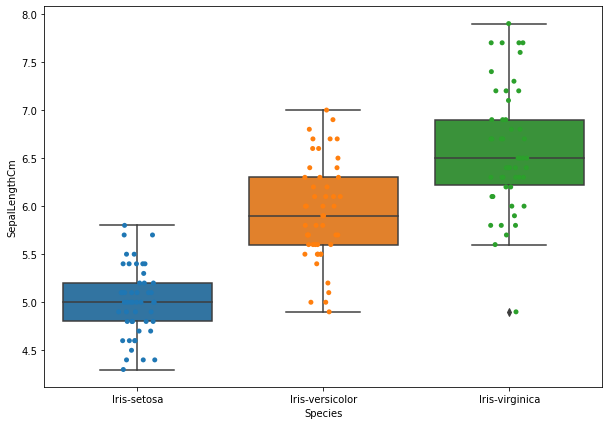

In [11]:
# Boxplot
fig=plt.gcf()
fig.set_size_inches(10,7)
fig=sns.boxplot(x='Species',y='SepalLengthCm',data=data)
fig=sns.stripplot(x='Species',y='SepalLengthCm',data=data,jitter=True,edgecolor='gray')

### By observing the boxplot , we see that some outliers are present int Iris-Virginica


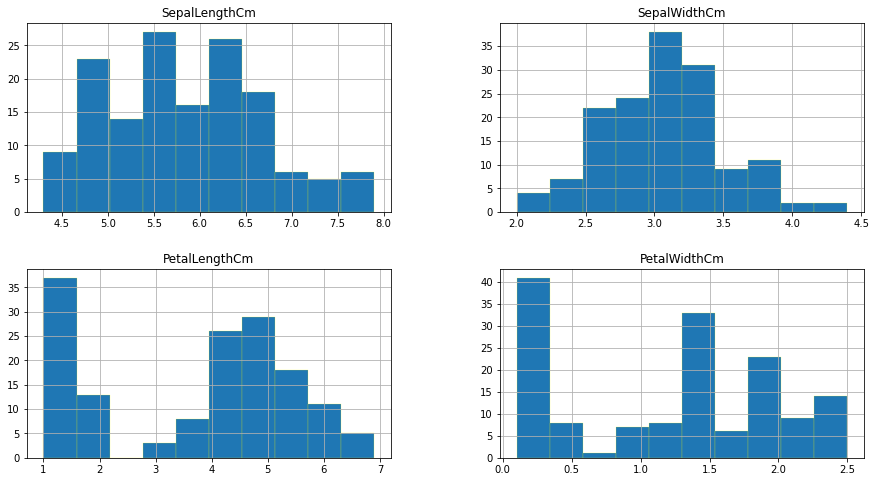

In [15]:
tmp = data.drop('Id', axis=1)
tmp.hist(edgecolor='yellow', linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.show()

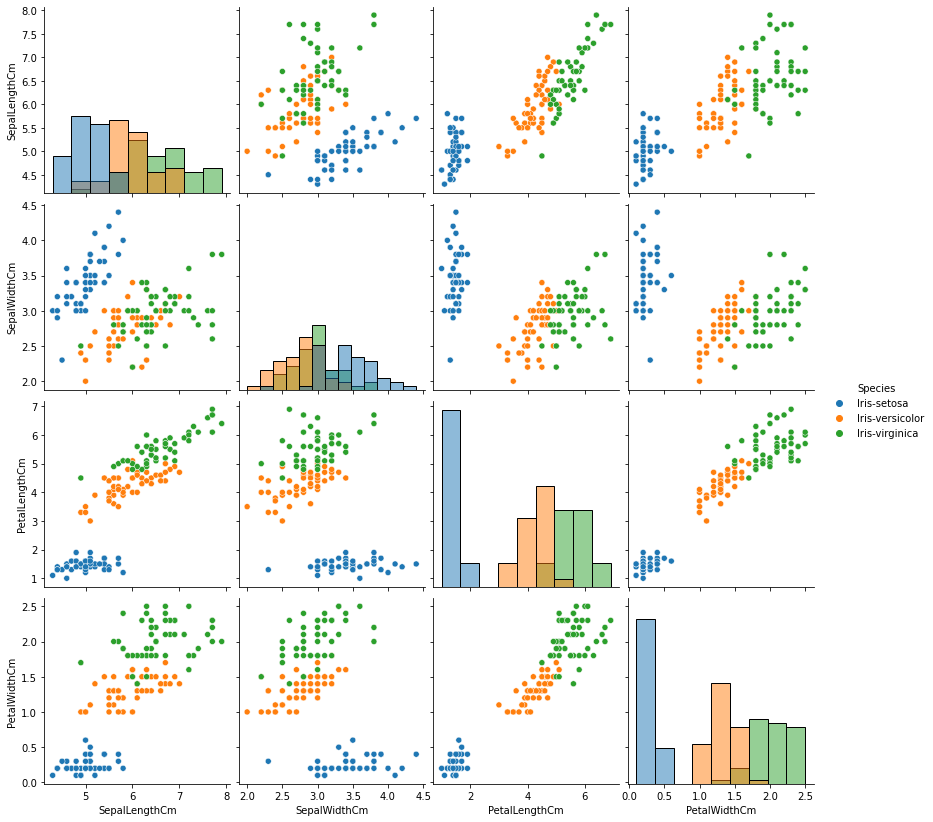

In [18]:
sns.pairplot(tmp, hue="Species", diag_kind="hist", size=2.9);

### This shows versicolor and virginica are very similar rather than setosa .But there could be features that you didn't measure that would more clearly separate the species.
Therefore we need Unsupervised Learning to separate the correctly

### Converting Species to Numeric data for data preparation

In [21]:
d = data.drop(['Species'], axis=1)
y = data['Species']

In [22]:
def y_label (invalue):
    if invalue == 'Iris-setosa' :
        return 1
    elif invalue == 'Iris-virginica' :
        return 0
    else :
        return 2
df1 = pd.DataFrame(data=y.values, columns=['species'])

df1['index']=df1['species'].apply(y_label)

In [23]:
d.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
dtype: object

In [24]:
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [25]:
# Data Scaling
std_scale = StandardScaler().fit(d)
data_scaled = std_scale.transform(d)

X_scaled = pd.DataFrame(data_scaled, columns = d.columns)

X_scaled.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
72,-0.057736,0.553333,-1.281972,0.649027,0.396172
95,0.473438,-0.173674,-0.124958,0.250967,0.001753
35,-0.912234,-1.021849,0.337848,-1.455004,-1.312977
101,0.612005,-0.052506,-0.819166,0.762759,0.922064
68,-0.150114,0.432165,-1.976181,0.421564,0.396172


# K-Means Algorithm

In [37]:
def plot_kmeans_scale(k) :

    kmeans_model = KMeans(n_clusters=k, random_state=123)
    kmeans_model.fit(data_scaled)
    #Make predictions
    labels=kmeans_model.predict(data_scaled)
    #to get centroids
    centroid=kmeans_model.cluster_centers_
    colors=['r','g','p','b','o','y','m','w']
    fig = plt.figure(1, figsize=(6,6))
    kx = Axes3D(fig, rect=[0, 0, 1, 1], elev=49, azim=135)
    for i in range(k) :
        points=np.array([data_scaled[j]for j in range(len(data_scaled))if labels[j]>=i])
        kx.scatter(points[:, 3], points[:, 0], points[:, 2],s=5, cmap='jet')#colors[i]) 
        kx.scatter(centroid[:,0],centroid[:,1],marker='*',s=200,c='red')
      
        #plt.title('Number of clusters = {}'.format(k))
        plt.show()

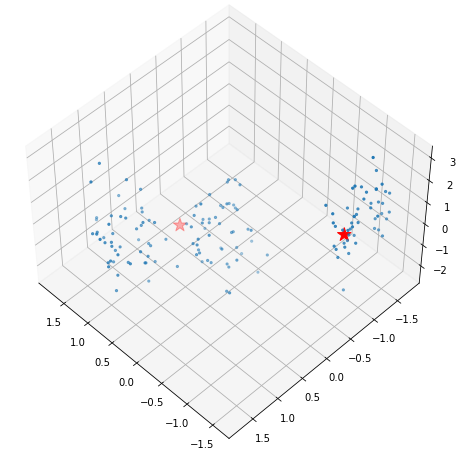

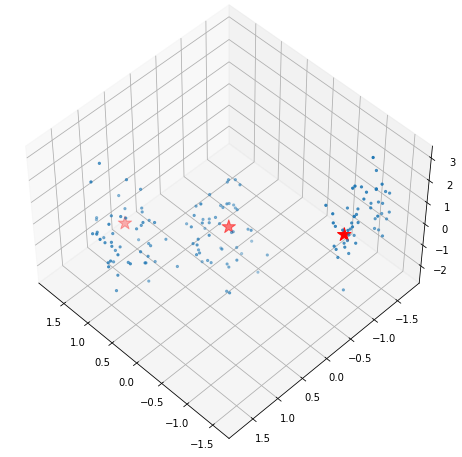

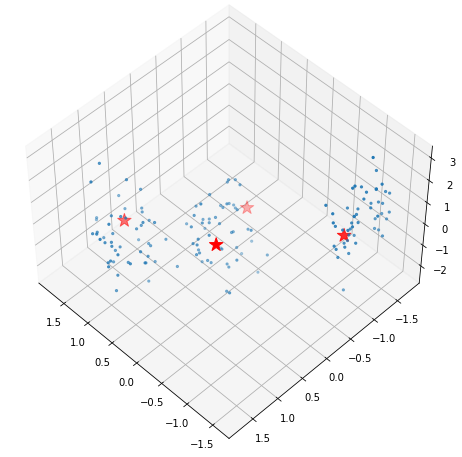

In [39]:
k=4
for i in range(k+1):
    if  i>1 :
        plot_kmeans_scale(i)

### Now let us found optimal clusters

Text(3.1, 5001, 'optimal number of clusters = 3')

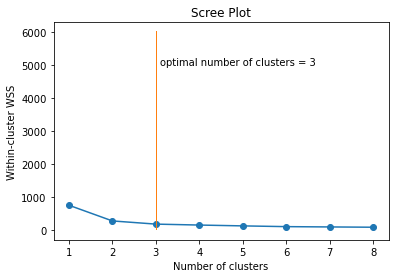

In [40]:
k=9
WSS = []
for k in range(1,9):
        kmeans_model = KMeans(n_clusters=k, random_state=123)
        kmeans_model.fit(data_scaled)
        WSS.append(kmeans_model.inertia_)
plt.plot(range(1,9), WSS, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Scree Plot")
plt.plot([3]*6000, range(1,6001), ",")
plt.text(3.1, 5001, "optimal number of clusters = 3")

Therefore three  clusters were considered as optimal clusters


### K-means clustering with 3 optimal Clusters


In [44]:
km = KMeans(n_clusters=3, random_state=123)
km.fit(data_scaled)
print('inertia with clusters=3 -->' ,km.inertia_)
km.cluster_centers_


inertia with clusters=3 --> 177.05608895062977


array([[ 1.14317894,  1.03542672, -0.07079946,  1.04224753,  1.09269889],
       [-1.1547262 , -1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [ 0.07560189,  0.03894137, -0.73184462,  0.30676007,  0.21508647]])

### Making predictions using K - 3

In [46]:
predicted_cluster = km.predict(data_scaled)
predicted_labels = km.labels_


Text(0.5, 0.92, 'K Means')

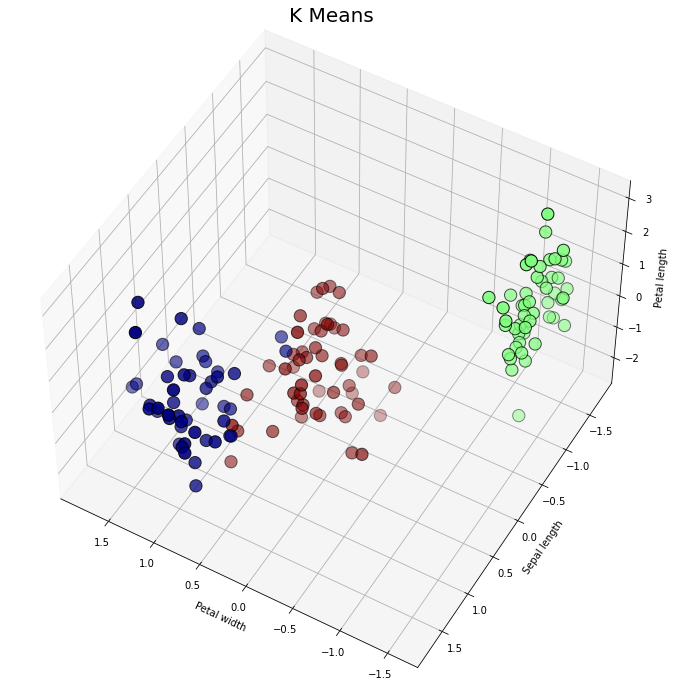

In [48]:
fig = plt.figure(1, figsize=(9,9))
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=50, azim=120)
ax.scatter(data_scaled[:, 3], data_scaled[:, 0], data_scaled[:, 2],
          c=predicted_labels.astype(np.float), cmap='jet',edgecolor="k", s=150)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("K Means", fontsize=20)

Now we are getting much separated versicolor and verginica

In [52]:
def predict_species (invalue):
    if invalue == 1:
        return 'Iris-setosa' 
    elif invalue == 0 :
        return 'Iris-virginica'
    else :
        return 'Iris-versicolor'
df1['predict_label']= pd.DataFrame(data=predicted_labels, columns=['predict_label'])

df1['predict_species']=df1['predict_label'].apply(predict_species)

In [55]:
df1[df1['species']!=df1['predict_species']]


,species,index,predict_label,predict_species
77,Iris-versicolor,2,0,Iris-virginica
86,Iris-versicolor,2,0,Iris-virginica
101,Iris-virginica,0,2,Iris-versicolor
106,Iris-virginica,0,2,Iris-versicolor
113,Iris-virginica,0,2,Iris-versicolor
119,Iris-virginica,0,2,Iris-versicolor
121,Iris-virginica,0,2,Iris-versicolor


Therefore we are getting only 7 predctions wrongs out of 150 total data set.